<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [3]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [4]:
# Loading the csv file as a python dictionary
def parse_csv(csvfile, column):
    d = defaultdict(list)
    with open(csvfile, newline='') as file:
        reader = csv.DictReader(file, column)
        next(reader)
        for row in reader:
            for field in column:
                d[field].append((row[field]))
    return dict(d)

In [5]:
print(parse_csv('sat_scores.csv', column=['State', 'Rate', 'Verbal', 'Math']))

{'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', '45'], 'Verbal': ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575', '593', '577', '592', '566',

In [6]:
dict_df = pd.DataFrame(parse_csv('sat_scores.csv', column=['State', 'Rate', 'Verbal', 'Math']))
dict_df.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [7]:
# Loading the csv file as a pandas dataframe
sat_scores = pd.read_csv('../Project_2/sat_scores.csv')

sat_scores.drop(labels='Unnamed: 4', axis=1, inplace=True)

sat_scores.dtypes

# Loading from dictionary to dataframe gives numerical columns with 'object' datatype as opposed to int64 datatype

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [8]:
# Data is split into 4 columns
# State refers to each of the 50 states in the United States
# Rate refers to participation rate for each state
# Verbal refers to the average score for the verbal component in that particular state
# Math refers to the average score for the math component in that particular state
# In sum, the data is about the average SAT scores across all states in the United States
sat_scores.head(10)

State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
5    RI    71     501   499
6    PA    71     500   499
7    VT    69     511   506
8    ME    69     506   500
9    VA    68     510   501

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [9]:
datadict = {'Variable Name' : ['State', 'Rate', 'Verbal', 'Math'], 
            'Variable Type' : ['Object', 'Integer', 'Integer', 'Integer'],
            'Description' : ['State refers to each of the 50 states in the United States', 'Rate refers to participation rate for each state',
                             'Verbal refers to the average score for the verbal component in that particular state',
                             'Math refers to the average score for the math component in that particular state']}

datadict_df = pd.DataFrame(datadict)

satscores_datadict = pd.concat([sat_scores, datadict_df], axis=1)

satscores_datadict.head(4)

State  Rate  Verbal  Math Variable Name Variable Type  \
0    CT    82     509   510         State        Object   
1    NJ    81     499   513          Rate       Integer   
2    MA    79     511   515        Verbal       Integer   
3    NY    77     495   505          Math       Integer   

                                         Description  
0  State refers to each of the 50 states in the U...  
1   Rate refers to participation rate for each state  
2  Verbal refers to the average score for the ver...  
3  Math refers to the average score for the math ...

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

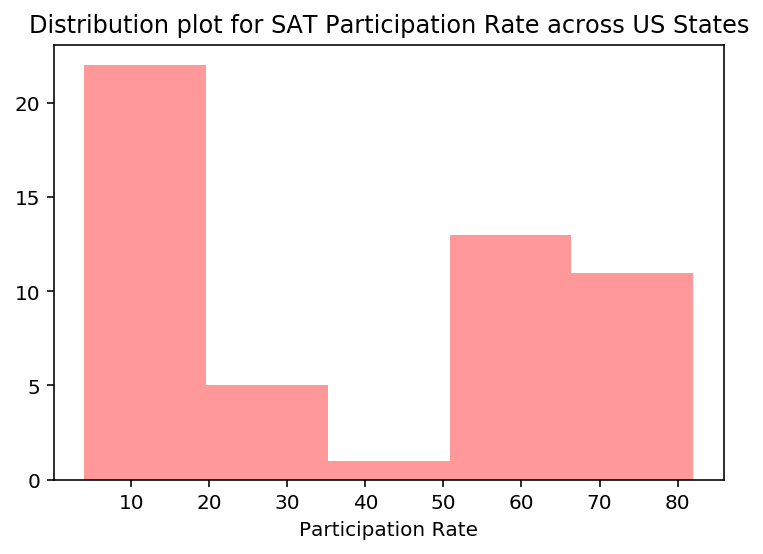

<Figure size 864x864 with 0 Axes>

In [10]:
# Distribution plot for Rate
sns.distplot(sat_scores['Rate'], kde=False, bins=5, color='red')
plt.title('Distribution plot for SAT Participation Rate across US States')
plt.xlabel('Participation Rate')
plt.figure(figsize=(12,12))
plt.show()

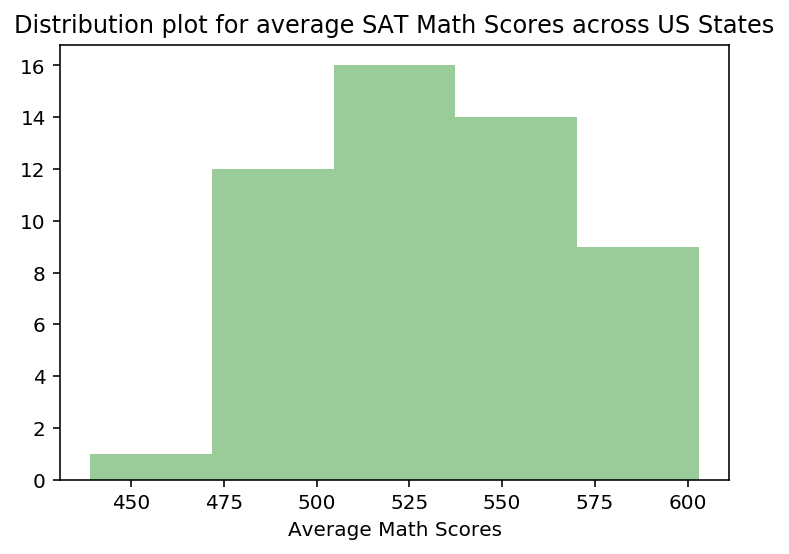

<Figure size 864x864 with 0 Axes>

In [11]:
# Distribution plot for Math
sns.distplot(sat_scores['Math'], kde=False, bins=5, color='green')
plt.title('Distribution plot for average SAT Math Scores across US States')
plt.xlabel('Average Math Scores')
plt.figure(figsize=(12,12))
plt.show()

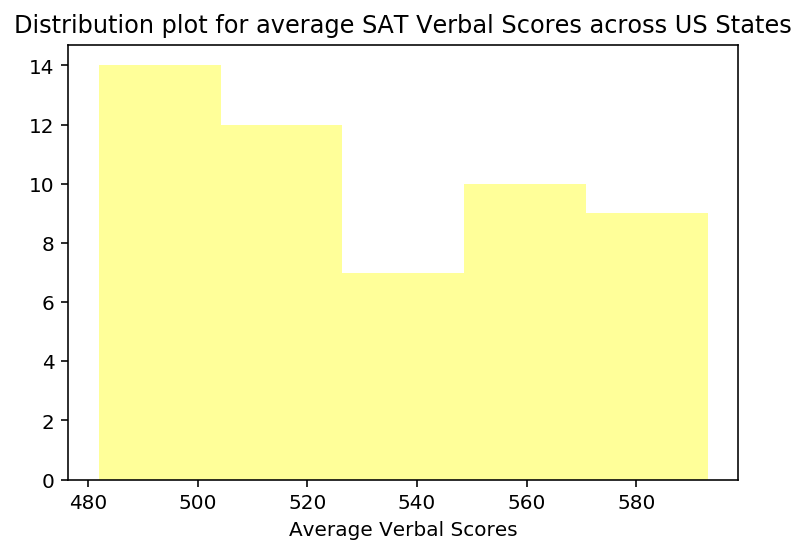

<Figure size 864x864 with 0 Axes>

In [12]:
# Distribution plot for Verbal
sns.distplot(sat_scores['Verbal'], kde=False, bins=5, color='yellow')
plt.title('Distribution plot for average SAT Verbal Scores across US States')
plt.xlabel('Average Verbal Scores')
plt.figure(figsize=(12,12))
plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

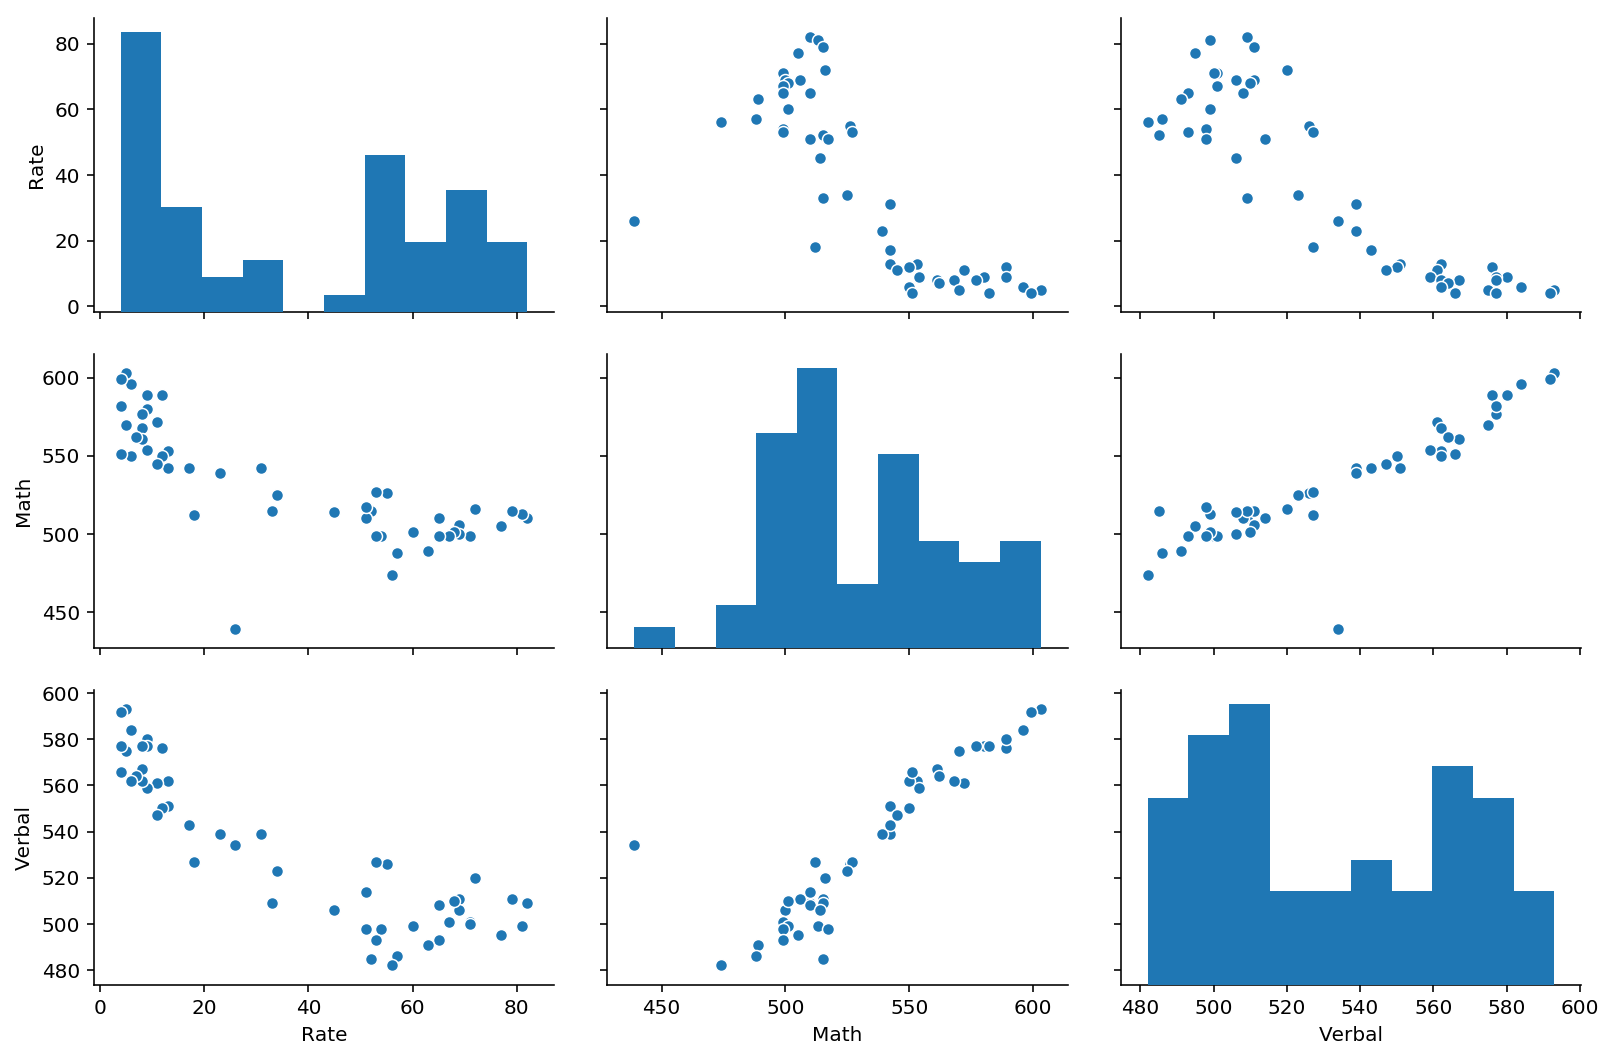

In [18]:
sns.pairplot(sat_scores, vars=['Rate', 'Math', 'Verbal'], aspect=1.5, height=2.5)

# Observations
1. There is a positive correlation between peformance in math and verbal. States that did well in verbal also did well in math.
2. States with higher participation rate tended to fare more poorly than states with lower participation rate for both math and verbal.
3. There is one outlier state that does not conform with the statistical trend.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

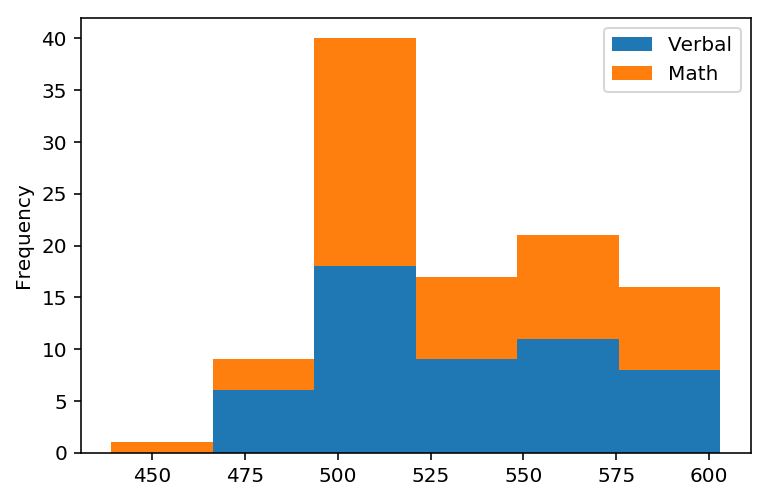

In [19]:
sat_scores[['Verbal', 'Math']].plot(kind='hist', stacked=True, bins=6)

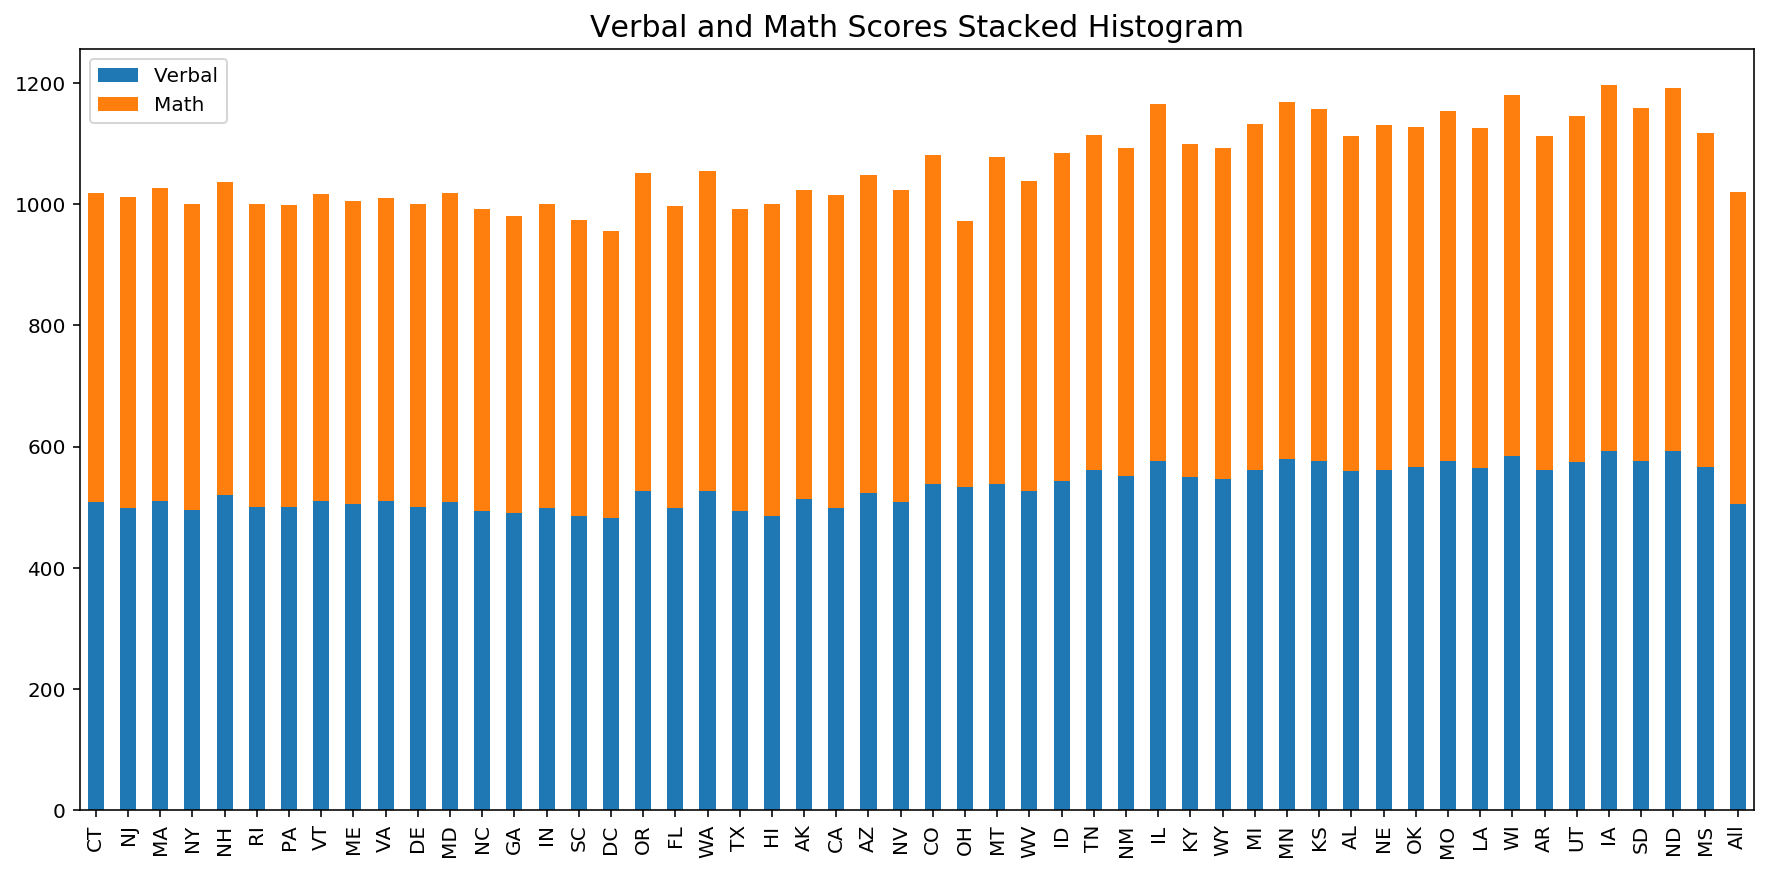

In [22]:
# Alternatively
fig = plt.figure(figsize=(15,7))
ax = fig.gca()

# Plot the bars for just verbal and math
sat_scores[['Verbal','Math']].plot(kind='bar', stacked=True, ax=ax)

# Setting the title
plt.title('Verbal and Math Scores Stacked Histogram', fontsize=15)

# Setting the labels for the stacked histogram
ax.set_xticklabels(sat_scores.State)

plt.show()





### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

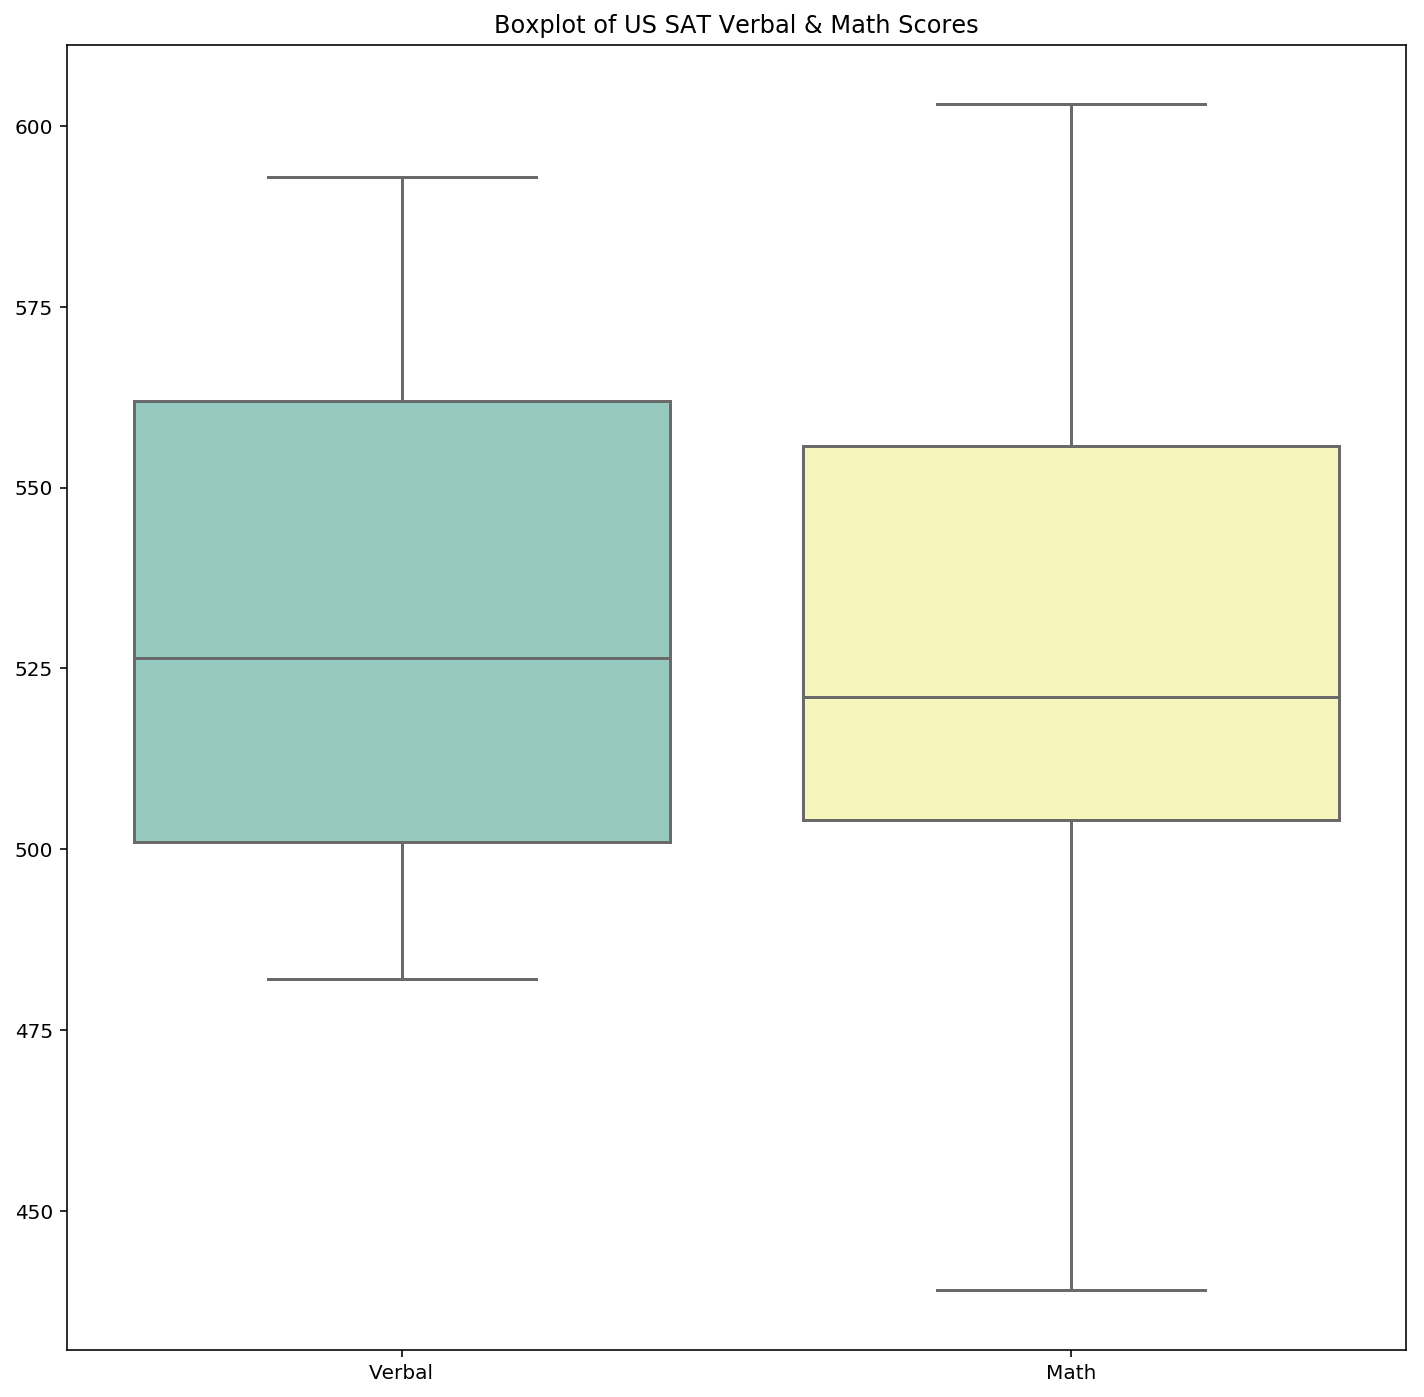

In [23]:
boxplot_df = sat_scores[['Verbal', 'Math']]

fig = plt.figure(figsize=(12,12))
ax = fig.gca()
ax = sns.boxplot(data = boxplot_df, palette='Set3')
plt.title('Boxplot of US SAT Verbal & Math Scores')
plt.show()

# Benefits of using a boxplot over a scatterplot/histogram
Boxplot can show the min, max, median, 1st and 3rd quartile values. As opposed to scatterplot/histogram, where they don't show the above information clearly. They are more useful to show the distribution/frequency of the dataset

# What's wrong with plotting Rate on same chart as Math & Verbal
The range of values between Rate and the other values are different. Therefore, plotting them on the same chart won't allow for very meaningful comparison of values between them

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


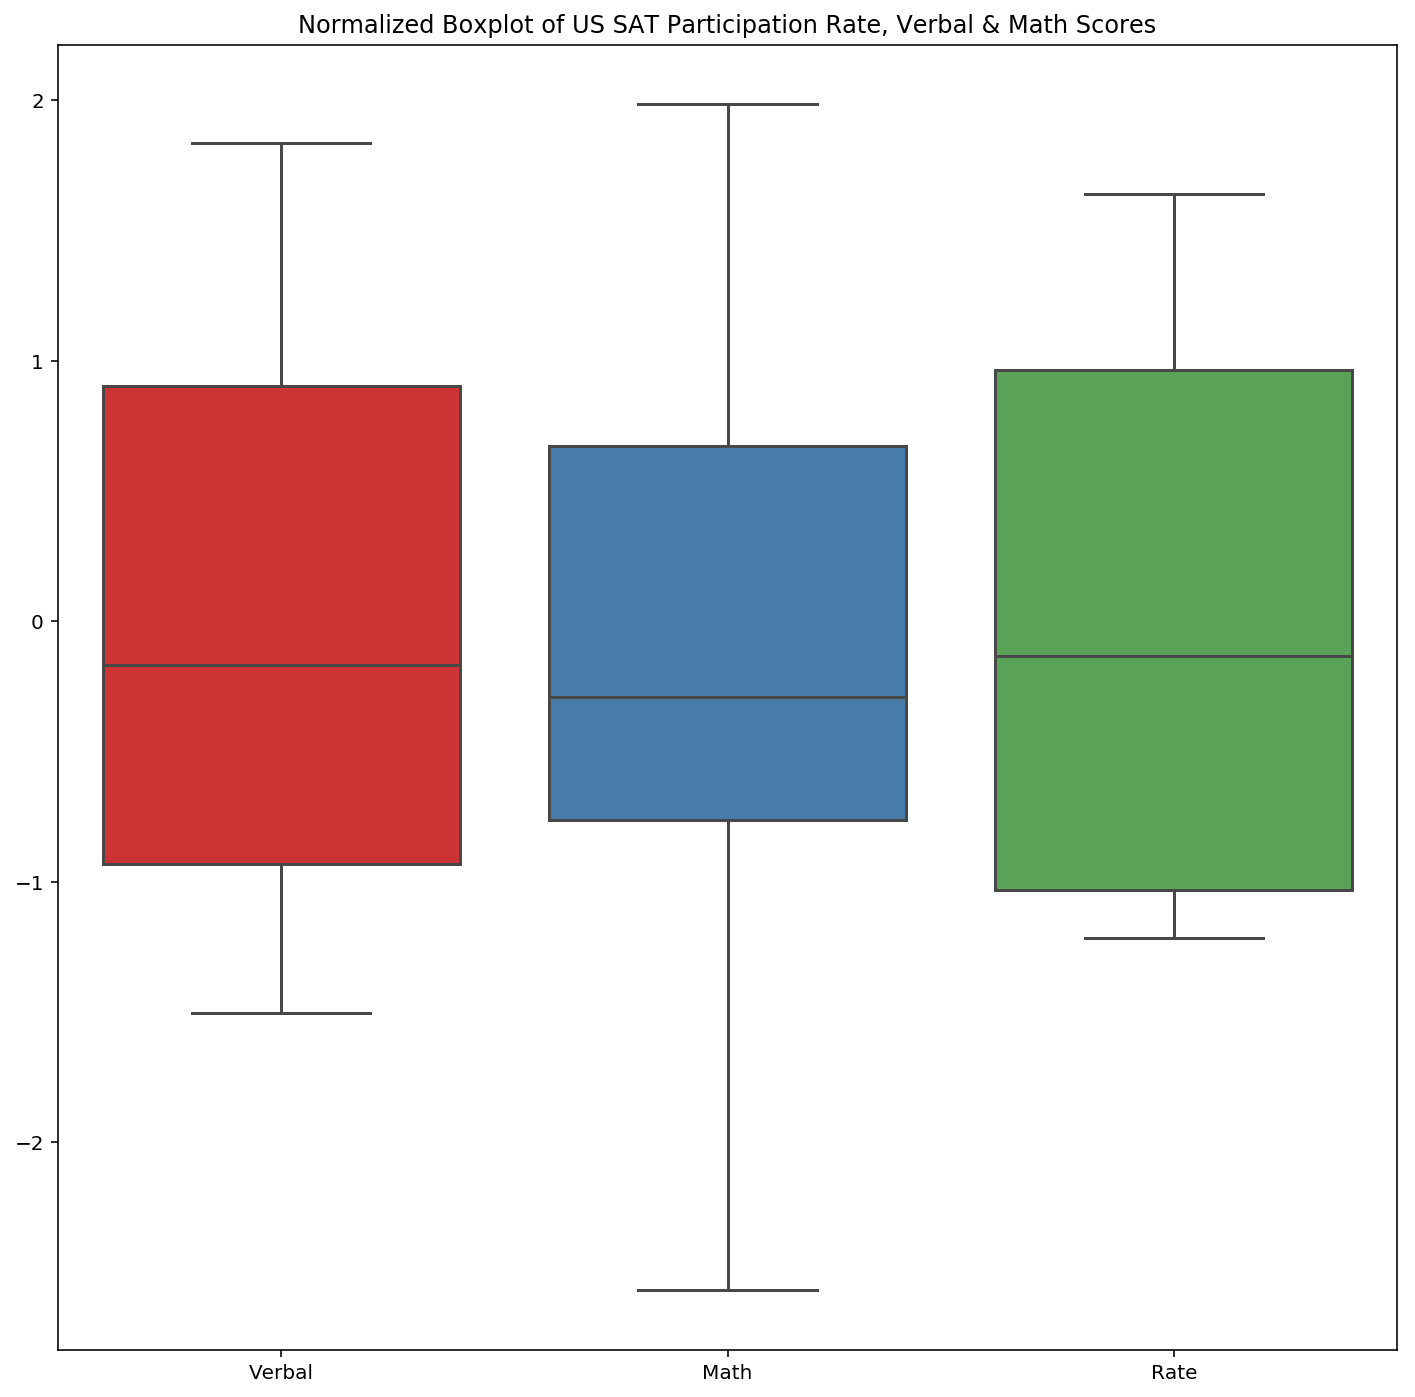

In [24]:
# Best way to compare these variables on the same boxplot chart is to standardize them
# After standardization, each of these variables willk have a mean of 0 and standard deviation of 1
# This makes them easily comparable on the same box chart

norm = sat_scores[['Verbal', 'Math', 'Rate']]
norm = (norm - norm.mean()) / norm.std()




fig = plt.figure(figsize=(12,12))
ax = fig.gca()
ax = sns.boxplot(data = norm, palette='Set1')
plt.title('Normalized Boxplot of US SAT Participation Rate, Verbal & Math Scores')

plt.show()



<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [26]:
# 24 states above the average of Verbal Scores
# This indicates that because essentially half of the states are above the mean, 
# the distribution of verbal scores is not significantly skewed positively or negatively.
sat_scores[sat_scores['Verbal'] > sat_scores['Verbal'].mean()]

State  Rate  Verbal  Math
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [27]:
# 26 states above the median as compared to 24 states above the mean
# Numbers are pretty close, this indicates that the distribution is not likely skewed in either direction
sat_scores[sat_scores['Verbal'] > sat_scores['Verbal'].median()]

State  Rate  Verbal  Math
19    WA    53     527   527
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
29    WV    18     527   512
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12     576   589
34    KY    12     550   550
35    WY    11     547   545
36    MI    11     561   572
37    MN     9     580   589
38    KS     9     577   580
39    AL     9     559   554
40    NE     8     562   568
41    OK     8     567   561
42    MO     8     577   577
43    LA     7     564   562
44    WI     6     584   596
45    AR     6     562   550
46    UT     5     575   570
47    IA     5     593   603
48    SD     4     577   582
49    ND     4     592   599
50    MS     4     566   551

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [28]:
sat_scores['Difference'] = sat_scores['Verbal'] - sat_scores['Math']
sat_scores.head(10)

State  Rate  Verbal  Math  Difference
0    CT    82     509   510          -1
1    NJ    81     499   513         -14
2    MA    79     511   515          -4
3    NY    77     495   505         -10
4    NH    72     520   516           4
5    RI    71     501   499           2
6    PA    71     500   499           1
7    VT    69     511   506           5
8    ME    69     506   500           6
9    VA    68     510   501           9

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [29]:
# Dataframe where Verbal > Math
df1 = sat_scores.sort_values(by='Difference', ascending=False).head(10)
df1

State  Rate  Verbal  Math  Difference
27    OH    26     534   439          95
50    MS     4     566   551          15
29    WV    18     527   512          15
45    AR     6     562   550          12
32    NM    13     551   542           9
31    TN    13     562   553           9
9     VA    68     510   501           9
16    DC    56     482   474           8
8     ME    69     506   500           6
41    OK     8     567   561           6

In [30]:
# Datarame where Math > Verbal
df2 = sat_scores.sort_values(by='Difference', ascending=True).head(10)
df2

State  Rate  Verbal  Math  Difference
21    HI    52     485   515         -30
23    CA    51     498   517         -19
1     NJ    81     499   513         -14
33    IL    12     576   589         -13
44    WI     6     584   596         -12
36    MI    11     561   572         -11
3     NY    77     495   505         -10
47    IA     5     593   603         -10
37    MN     9     580   589          -9
51   All    45     506   514          -8

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [31]:
sat_scores.corr()
# Participation Rate vs Math & Verbal are rather strongly negatively correlated
# Verbal and Math scores are also highly positively correlated
# Verbal score has little to no relationship with the difference between verbal and math scores. 
# This means that as Verbal scores go up, this does not imply that the difference between verbal and Math increases.
# On the other hand, math scores have a moderate negative correlation with the difference between verbal and math scores
# This means that as the difference increases, Math scores is likely to decrease

Rate    Verbal      Math  Difference
Rate        1.000000 -0.886432 -0.773746   -0.101412
Verbal     -0.886432  1.000000  0.899871    0.052600
Math       -0.773746  0.899871  1.000000   -0.388219
Difference -0.101412  0.052600 -0.388219    1.000000

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [33]:
sat_scores.describe()

# Count: the number of observations/rows/states
# mean: the mean of the column
# std: standard deviation of the column
# min: minimum value of the column
# 25%: the 25% quantile, which is, if we were to order all the values in the column from lowest to highest, 
# the value 25% of the way through.
# 50%: this is the same but at 50%, which is also known as the median
# 75% same thing at 75%
# max: the maximum value in the column

Rate      Verbal        Math  Difference
count  52.000000   52.000000   52.000000   52.000000
mean   37.153846  532.019231  531.500000    0.519231
std    27.301788   33.236225   36.014975   15.729939
min     4.000000  482.000000  439.000000  -30.000000
25%     9.000000  501.000000  504.000000   -6.000000
50%    33.500000  526.500000  521.000000    0.000000
75%    63.500000  562.000000  555.750000    4.250000
max    82.000000  593.000000  603.000000   95.000000

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [34]:
drug = pd.read_csv('../Project_2/drug-use-by-age.csv')
drug.head()

age     n  alcohol-use  alcohol-frequency  marijuana-use  \
0  12  2798          3.9                3.0            1.1   
1  13  2757          8.5                6.0            3.4   
2  14  2792         18.1                5.0            8.7   
3  15  2956         29.2                6.0           14.5   
4  16  3058         40.1               10.0           22.5   

   marijuana-frequency  cocaine-use cocaine-frequency  crack-use  \
0                  4.0          0.1               5.0        0.0   
1                 15.0          0.1               1.0        0.0   
2                 24.0          0.1               5.5        0.0   
3                 25.0          0.5               4.0        0.1   
4                 30.0          1.0               7.0        0.0   

  crack-frequency        ...          oxycontin-use oxycontin-frequency  \
0               -        ...                    0.1                24.5   
1             3.0        ...                    0.1                41.0   
2               -        ...                    0.4                 4.5   
3             9.5        ...                    0.8                 3.0   
4             1.0        ...                    1.1                 4.0   

   tranquilizer-use  tranquilizer-frequency  stimulant-use  \
0               0.2                    52.0            0.2   
1               0.3                    25.5            0.3   
2               0.9                     5.0            0.8   
3               2.0                     4.5            1.5   
4               2.4                    11.0            1.8   

  stimulant-frequency  meth-use  meth-frequency  sedative-use  \
0                 2.0       0.0               -           0.2   
1                 4.0       0.1             5.0           0.1   
2                12.0       0.1            24.0           0.2   
3                 6.0       0.3            10.5           0.4   
4                 9.5       0.3            36.0           0.2   

  sedative-frequency  
0               13.0  
1               19.0  
2               16.5  
3               30.0  
4                3.0  

[5 rows x 28 columns]

In [35]:
# There seems to be quite a few columns where its supposed to be numerical but datatype is object instead
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [36]:
# Creating a function to check where the problematic columns are at
def checker(column):
    for value in drug[column]:
        try:
            float(value)
        except:
            print('Column where error is from : ', column)
            print('Error : ', value)

In [37]:
# age, cocaine-frequency, crack-frequency, heroin-frequency, inhalant-frequency, oxycontin-frequency and meth-frequency
# are columns where there are 'object' like characters in otherwise numerical columns
columns = drug.columns
for categories in columns:
    checker(categories)

Column where error is from :  age
Error :  22-23
Column where error is from :  age
Error :  24-25
Column where error is from :  age
Error :  26-29
Column where error is from :  age
Error :  30-34
Column where error is from :  age
Error :  35-49
Column where error is from :  age
Error :  50-64
Column where error is from :  age
Error :  65+
Column where error is from :  cocaine-frequency
Error :  -
Column where error is from :  crack-frequency
Error :  -
Column where error is from :  crack-frequency
Error :  -
Column where error is from :  crack-frequency
Error :  -
Column where error is from :  heroin-frequency
Error :  -
Column where error is from :  inhalant-frequency
Error :  -
Column where error is from :  oxycontin-frequency
Error :  -
Column where error is from :  meth-frequency
Error :  -
Column where error is from :  meth-frequency
Error :  -


In [38]:
problem_list = ['cocaine-frequency', 'crack-frequency', 'heroin-frequency', 'inhalant-frequency', 
                'oxycontin-frequency', 'meth-frequency']

def float_corrector(column):
    drug[column] = drug[column].map(lambda x: float(x) if x != '-' else np.nan)


for column in problem_list:
    float_corrector(column)

In [39]:
# There are some range values for age
# I'll take the average value for those ranges
drug['age'].unique()

array(['12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22-23', '24-25', '26-29', '30-34', '35-49', '50-64', '65+'],
      dtype=object)

In [40]:
# Creating a dictionary to replace the age values
map = {'12':12, '13':13, '14':14, '15':15, '16':16, '17':17, '18':18,
       '19':19, '20':20, '21':21, '22-23':22.5, '24-25':24.5,
       '26-29':27.5, '30-34':32, '35-49':42, '50-64':57, '65+':65}

drug['new_age'] = drug['age'].apply(lambda x: map.get(x) if x in map else x)

In [41]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 29 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          16 non-null float64
crack-use                  17 non-null float64
crack-frequency            14 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           16 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         16 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycont

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [42]:
drug.describe().T

count         mean          std     min       25%  \
n                         17.0  3251.058824  1297.890426  2223.0  2469.000   
alcohol-use               17.0    55.429412    26.878866     3.9    40.100   
alcohol-frequency         17.0    33.352941    21.318833     3.0    10.000   
marijuana-use             17.0    18.923529    11.959752     1.1     8.700   
marijuana-frequency       17.0    42.941176    18.362566     4.0    30.000   
cocaine-use               17.0     2.176471     1.816772     0.0     0.500   
cocaine-frequency         16.0     7.875000     8.038449     1.0     5.000   
crack-use                 17.0     0.294118     0.235772     0.0     0.000   
crack-frequency           14.0    15.035714    18.111263     1.0     5.000   
heroin-use                17.0     0.352941     0.333762     0.0     0.100   
heroin-frequency          16.0    73.281250    70.090173     1.0    39.625   
hallucinogen-use          17.0     3.394118     2.792506     0.1     0.600   
hallucinogen-frequency    17.0     8.411765    15.000245     2.0     3.000   
inhalant-use              17.0     1.388235     0.927283     0.0     0.600   
inhalant-frequency        16.0     6.156250     4.860448     2.0     3.375   
pain-releiver-use         17.0     6.270588     3.166379     0.6     3.900   
pain-releiver-frequency   17.0    14.705882     6.935098     7.0    12.000   
oxycontin-use             17.0     0.935294     0.608216     0.0     0.400   
oxycontin-frequency       16.0    14.812500    12.798275     3.0     5.750   
tranquilizer-use          17.0     2.805882     1.753379     0.2     1.400   
tranquilizer-frequency    17.0    11.735294    11.485205     4.5     6.000   
stimulant-use             17.0     1.917647     1.407673     0.0     0.600   
stimulant-frequency       17.0    31.147059    85.973790     2.0     7.000   
meth-use                  17.0     0.382353     0.262762     0.0     0.200   
meth-frequency            15.0    35.966667    31.974581     2.0    12.000   
sedative-use              17.0     0.282353     0.138000     0.0     0.200   
sedative-frequency        17.0    19.382353    24.833527     3.0     6.500   
new_age                   17.0    25.617647    15.356726    12.0    16.000   

                             50%       75%     max  
n                        2798.00  3058.000  7391.0  
alcohol-use                64.60    77.500    84.2  
alcohol-frequency          48.00    52.000    52.0  
marijuana-use              20.80    28.400    34.0  
marijuana-frequency        52.00    52.000    72.0  
cocaine-use                 2.00     4.000     4.9  
cocaine-frequency           5.25     7.250    36.0  
crack-use                   0.40     0.500     0.6  
crack-frequency             7.75    16.500    62.0  
heroin-use                  0.20     0.600     1.1  
heroin-frequency           53.75    71.875   280.0  
hallucinogen-use            3.20     5.200     8.6  
hallucinogen-frequency      3.00     4.000    52.0  
inhalant-use                1.40     2.000     3.0  
inhalant-frequency          4.00     6.625    19.0  
pain-releiver-use           6.20     9.000    10.0  
pain-releiver-frequency    12.00    15.000    36.0  
oxycontin-use               1.10     1.400     1.7  
oxycontin-frequency        12.00    18.125    46.0  
tranquilizer-use            3.50     4.200     5.4  
tranquilizer-frequency     10.00    11.000    52.0  
stimulant-use               1.80     3.000     4.1  
stimulant-frequency        10.00    12.000   364.0  
meth-use                    0.40     0.600     0.9  
meth-frequency             30.00    47.000   105.0  
sedative-use                0.30     0.400     0.5  
sedative-frequency         10.00    17.500   104.0  
new_age                    20.00    27.500    65.0

In [59]:
use_columns = [x for x in drug.columns if 'use' in x]
freq_columns = [x for x in drug.columns if 'freq' in x]
use = drug[use_columns]

In [66]:
def plotter(columns):
    for column in columns:
        plt.figure(figsize=(15,3))
        ax = fig.gca()
        ax = sns.stripplot(y=drug[column], x=drug['age'].sort_values(ascending=True), size=15, orient='v', edgecolor='gray')
        

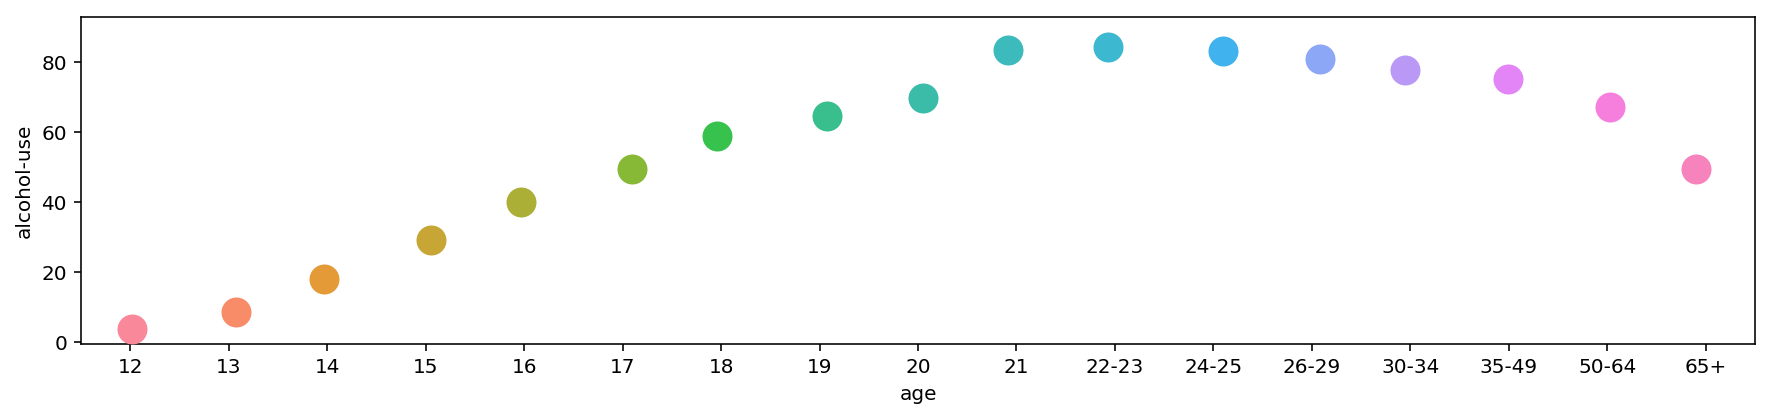

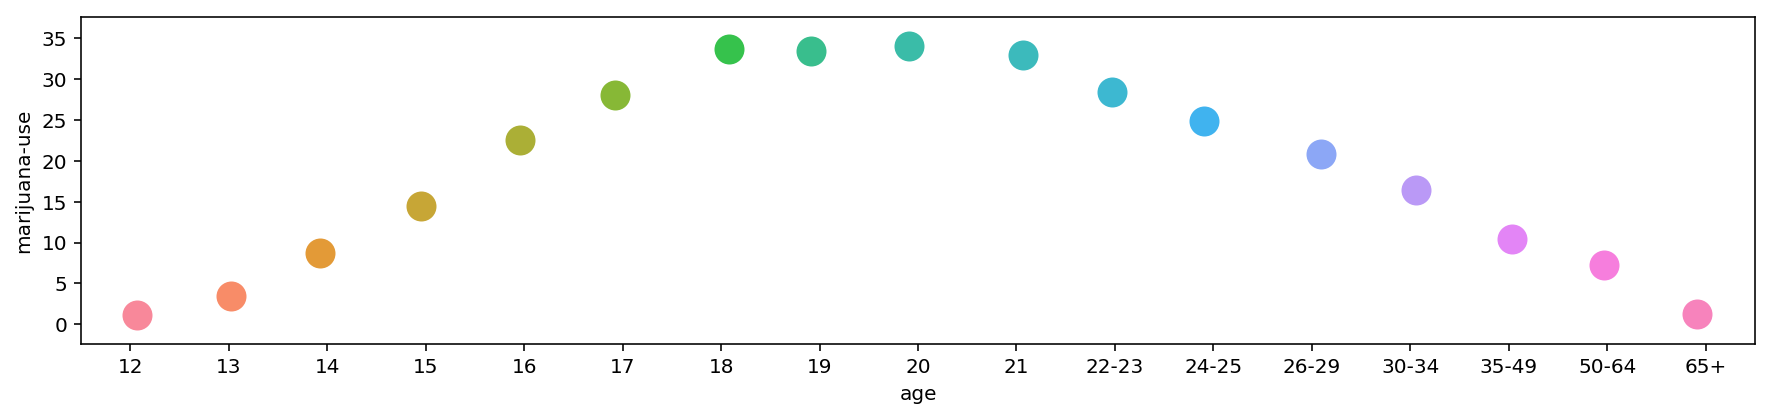

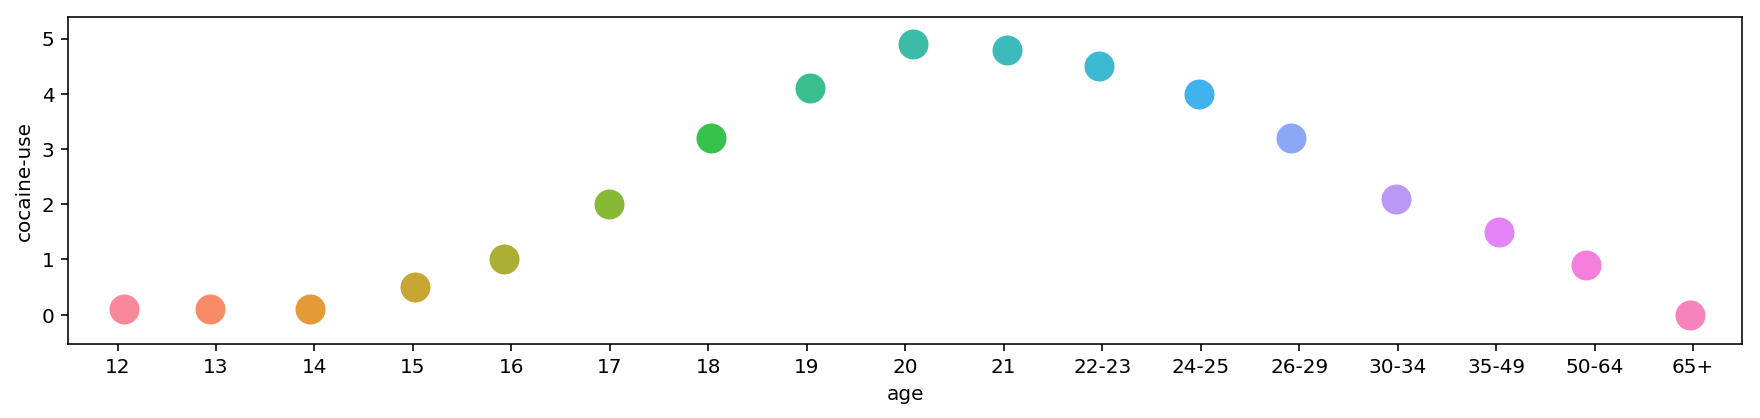

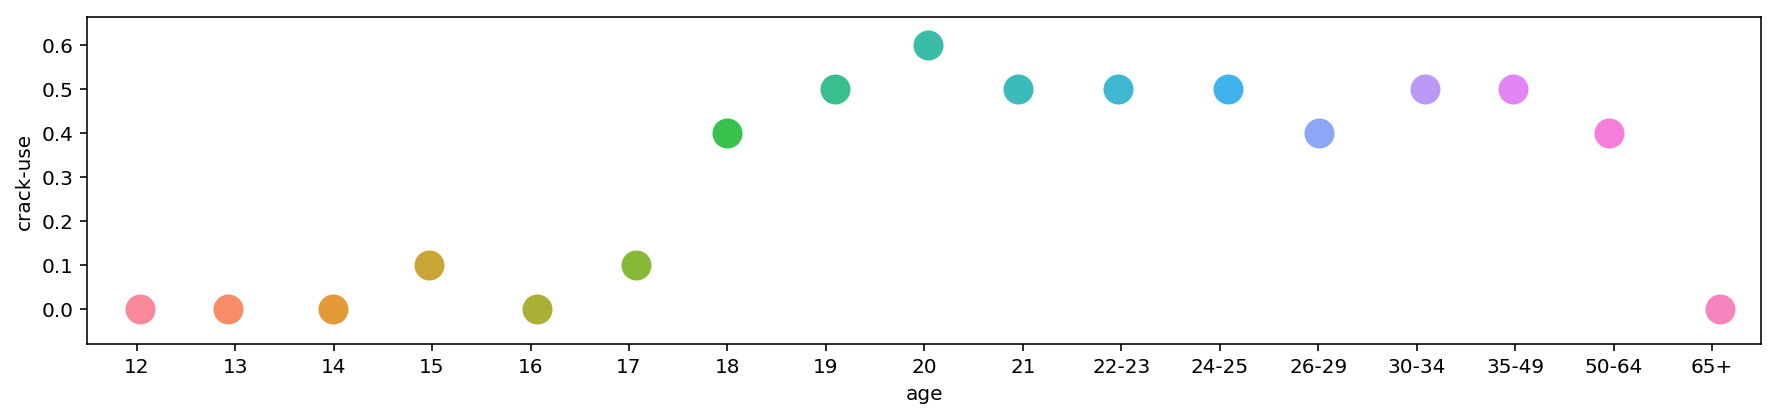

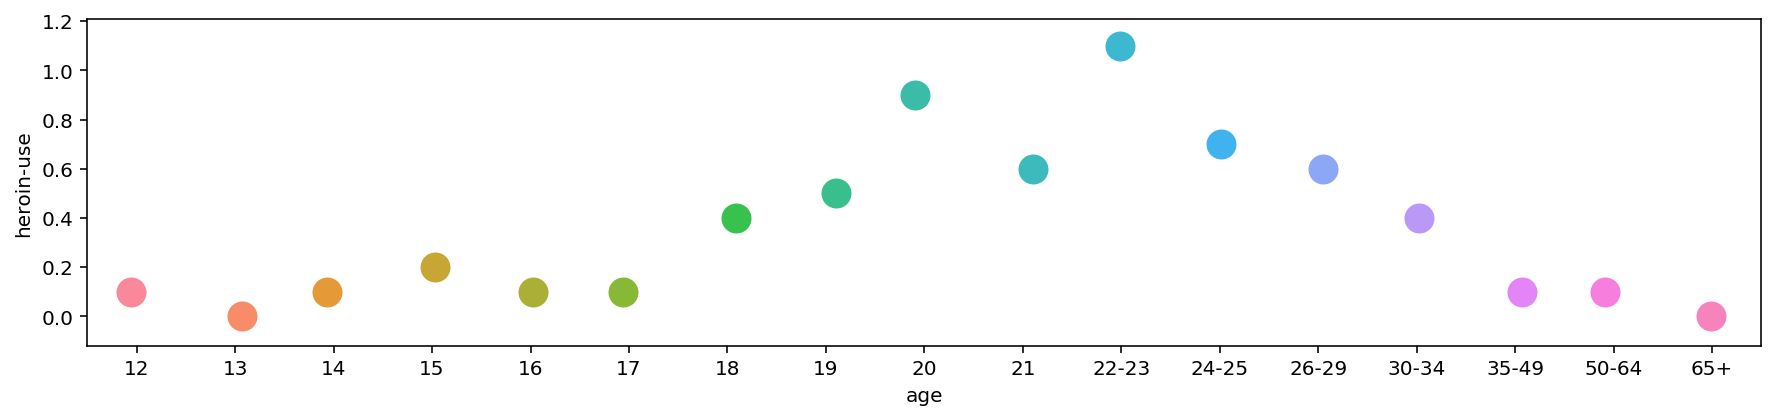

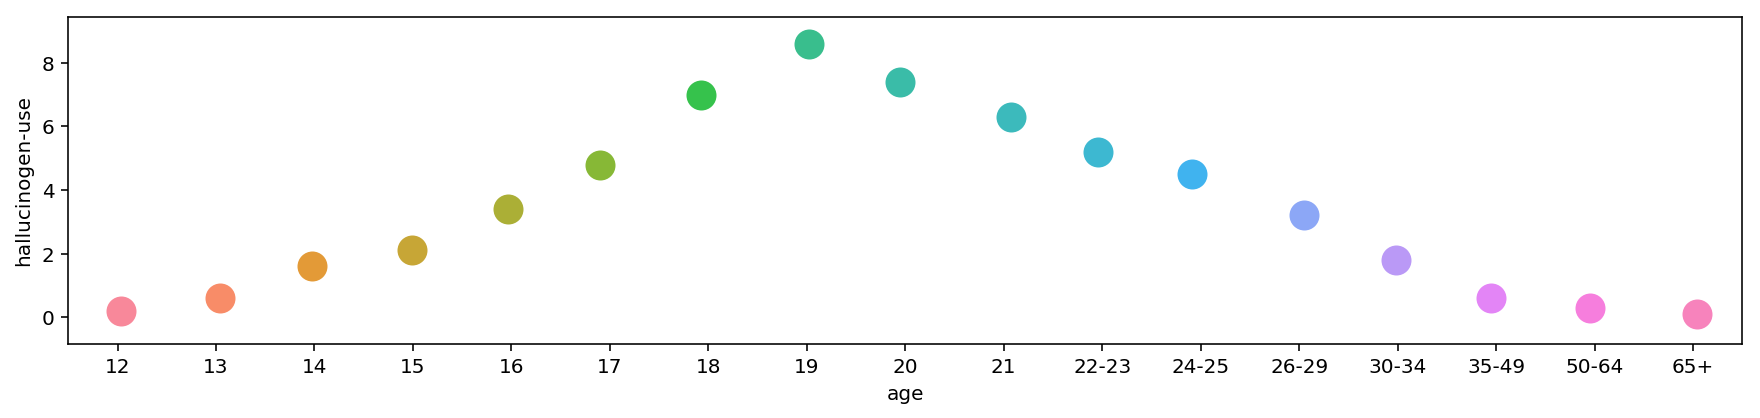

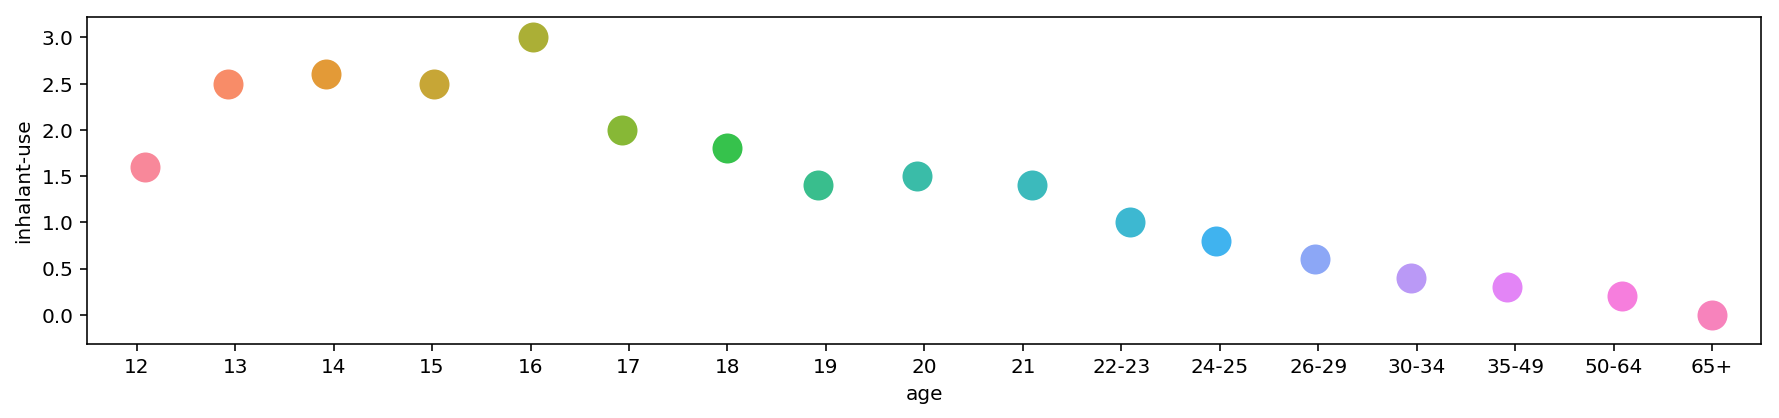

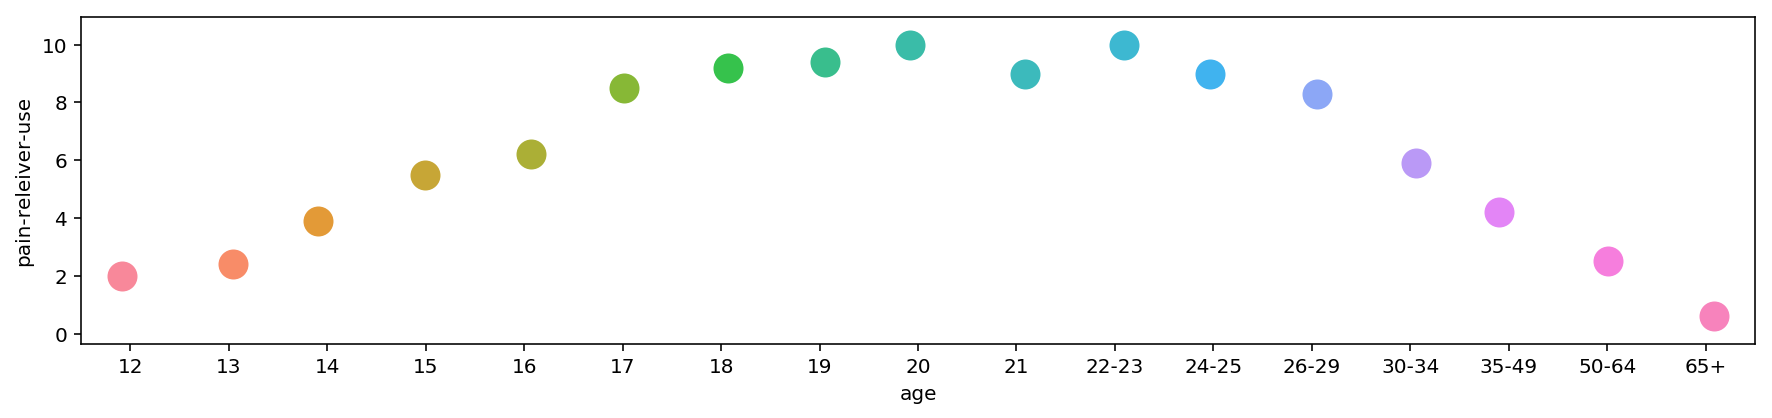

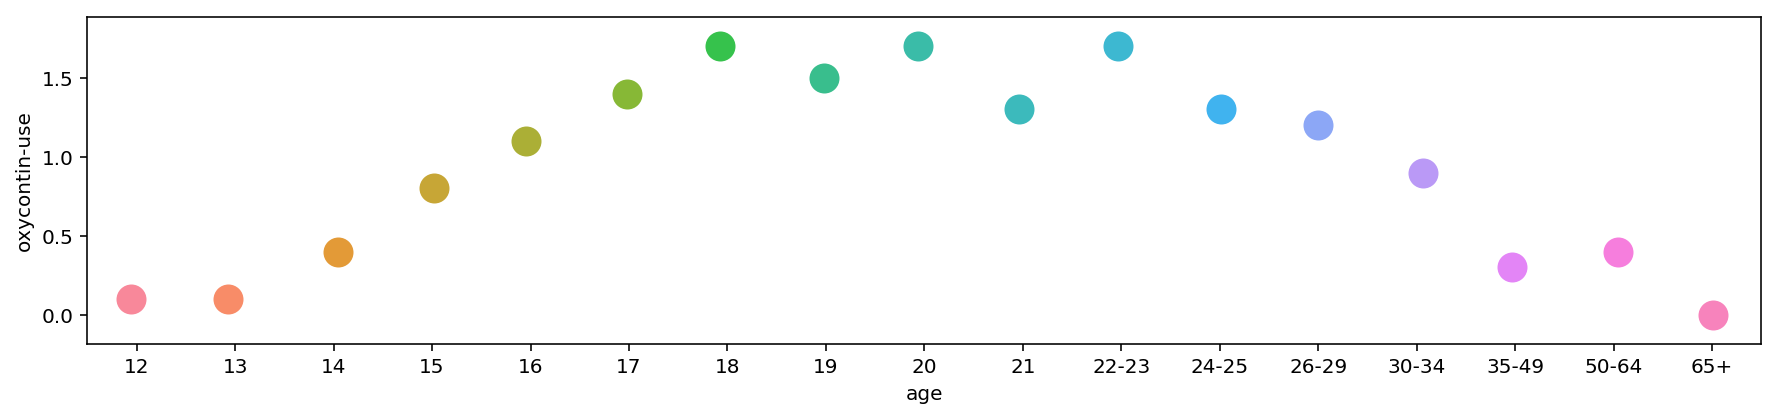

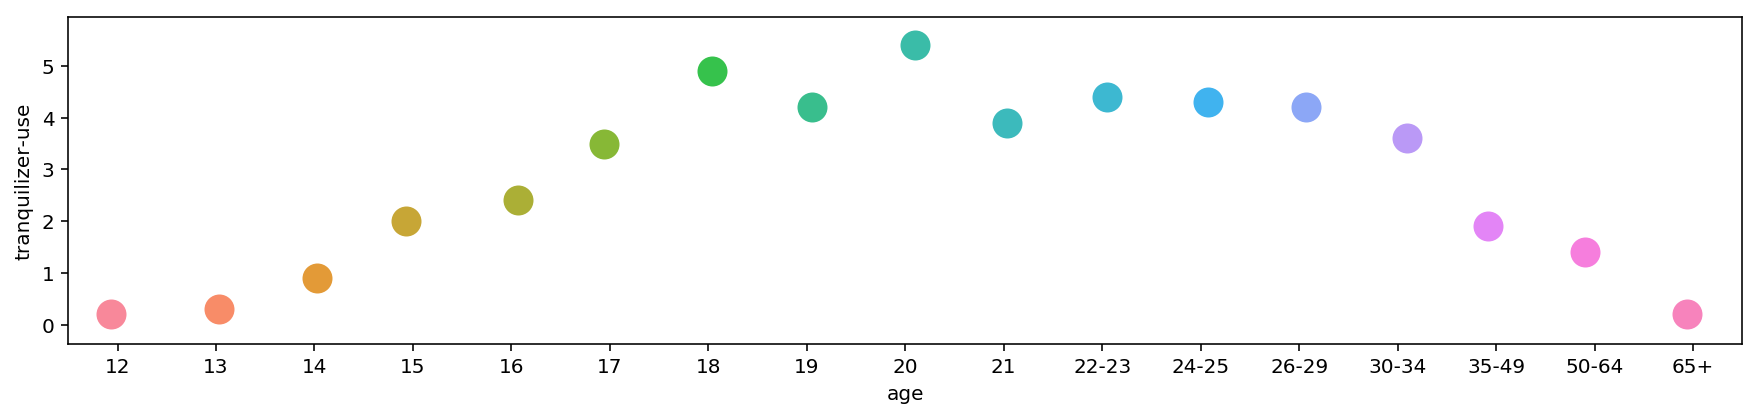

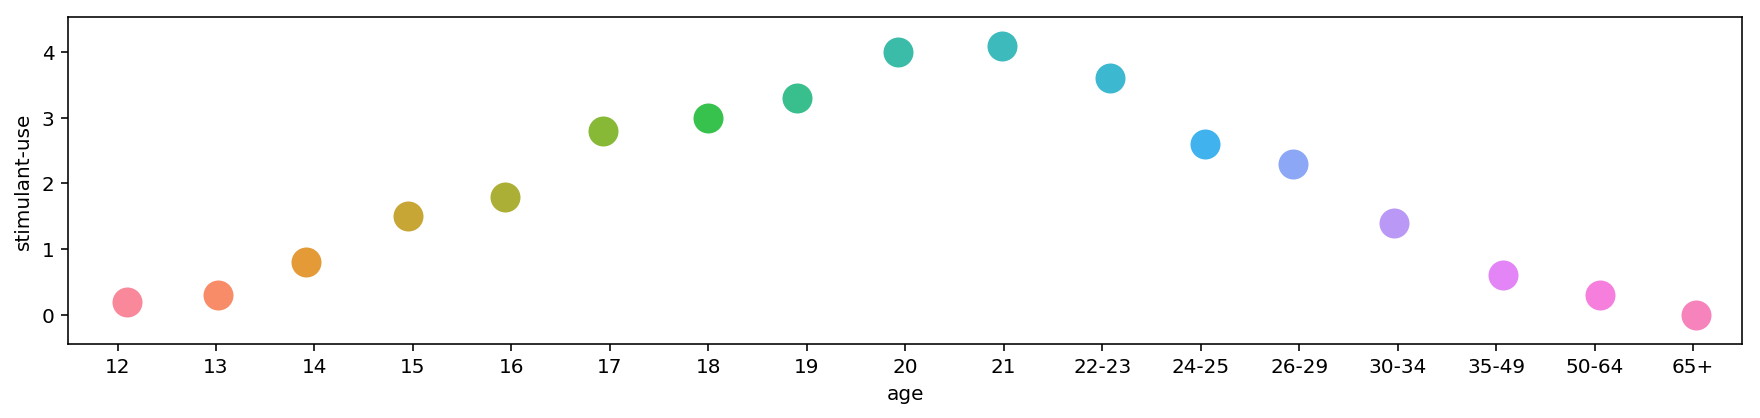

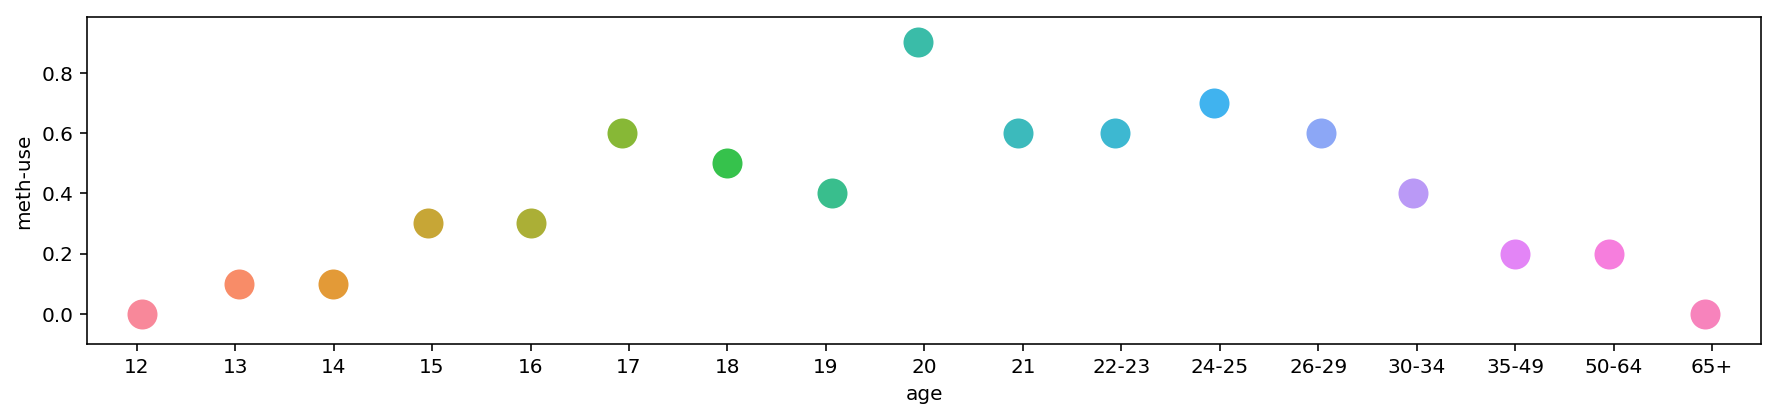

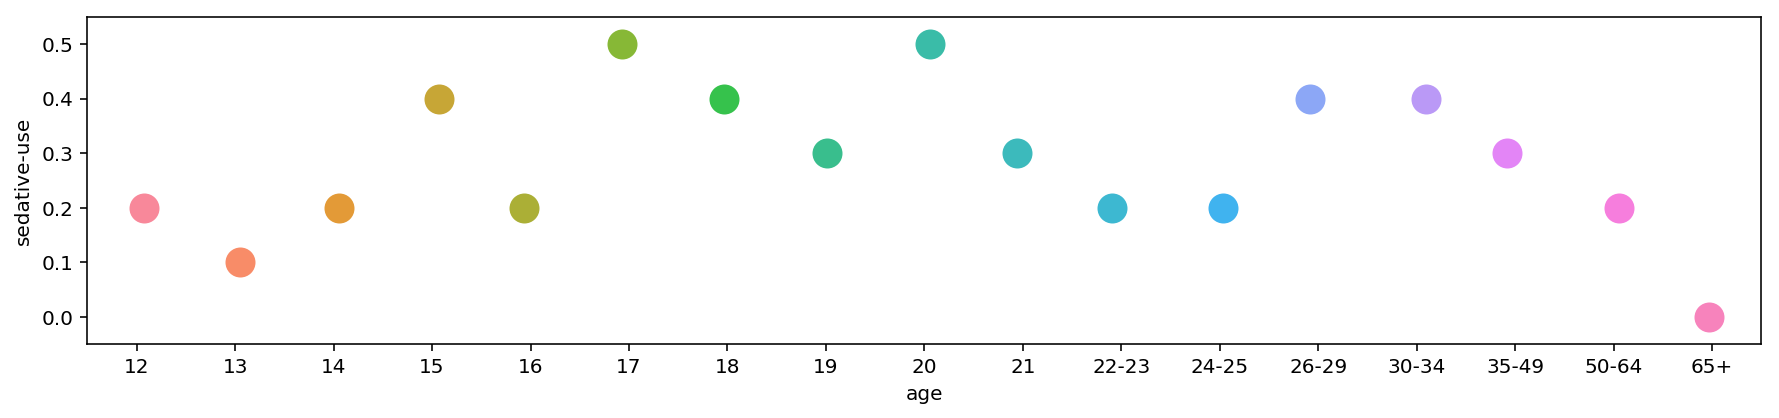

In [67]:
plotter(use_columns)

# In General, substance use follows the trend of a parabola curve, increasing as age increases till a peak at the middle 20s
# before it drops again.

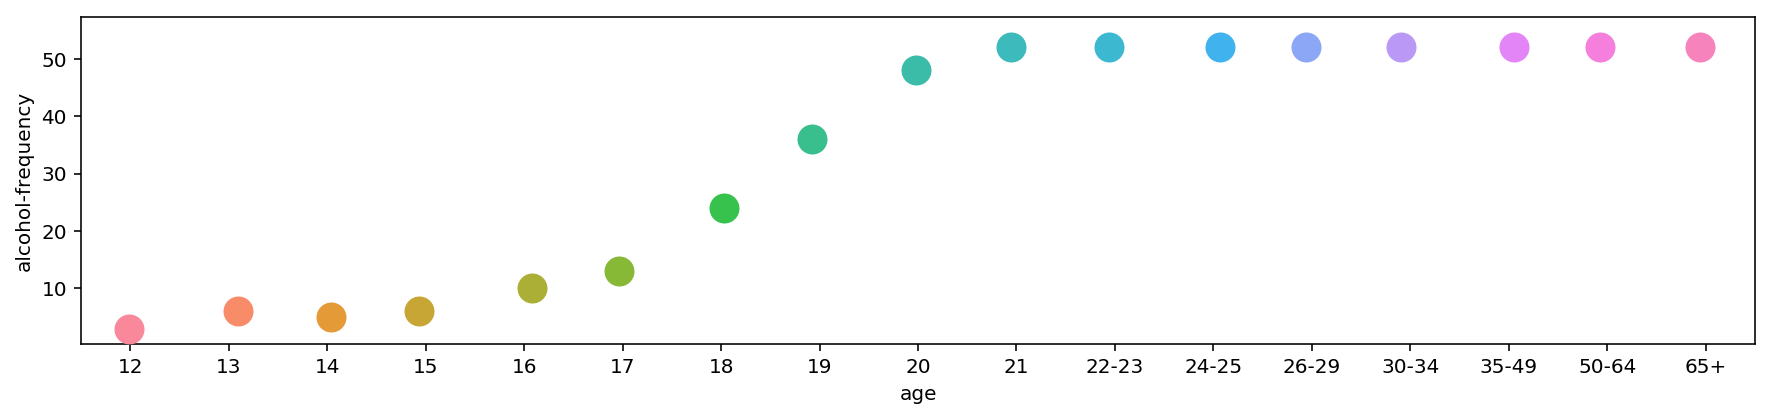

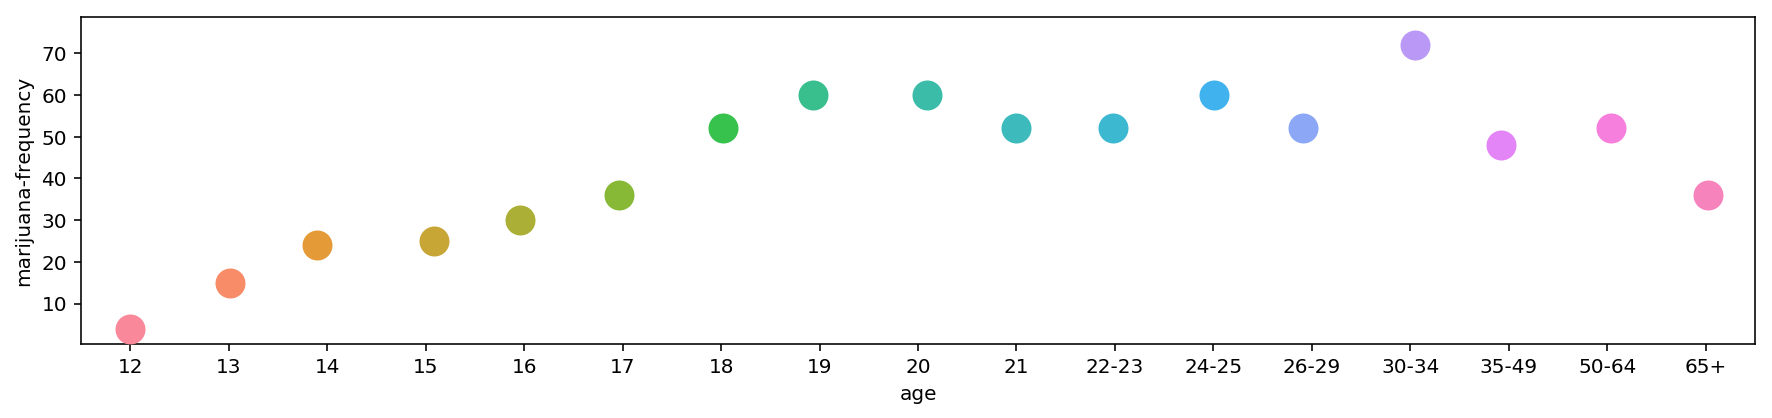

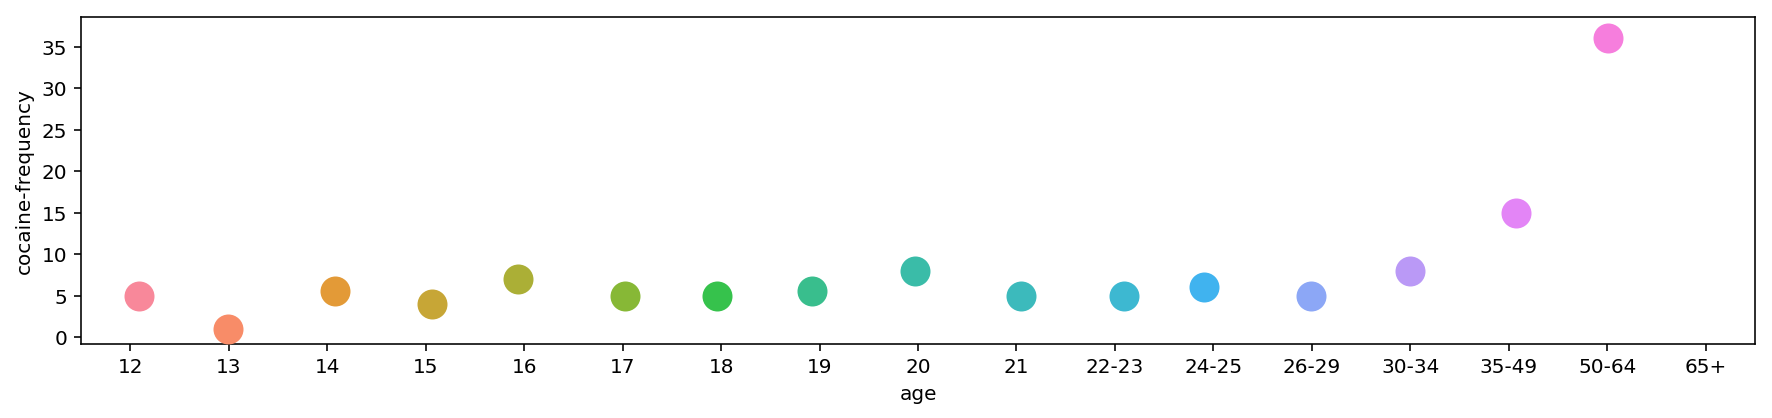

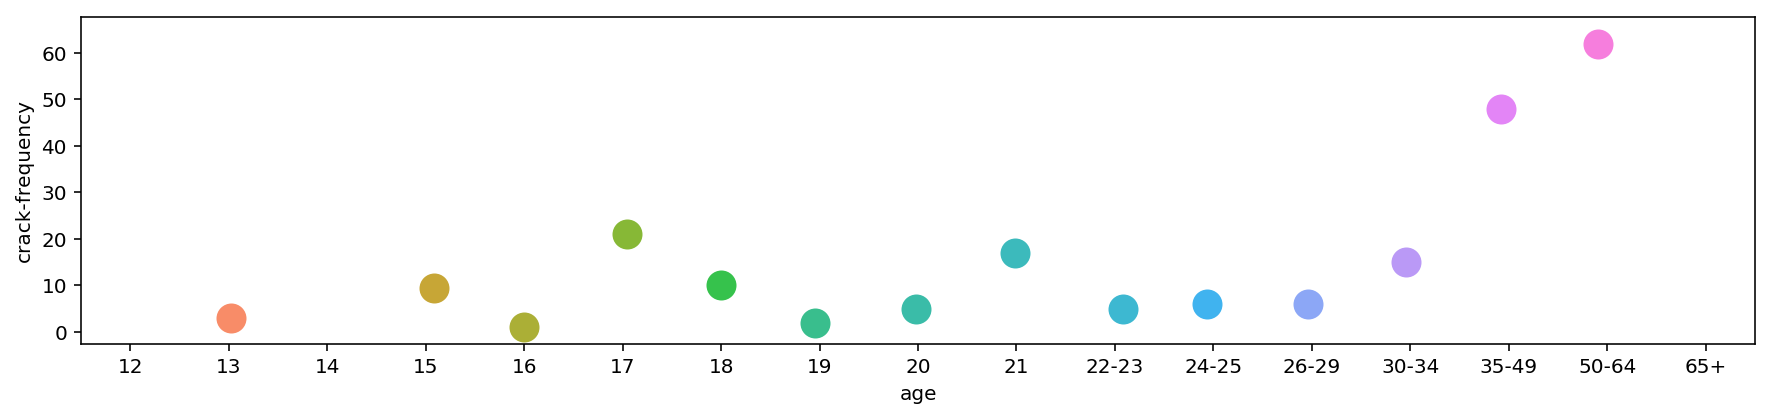

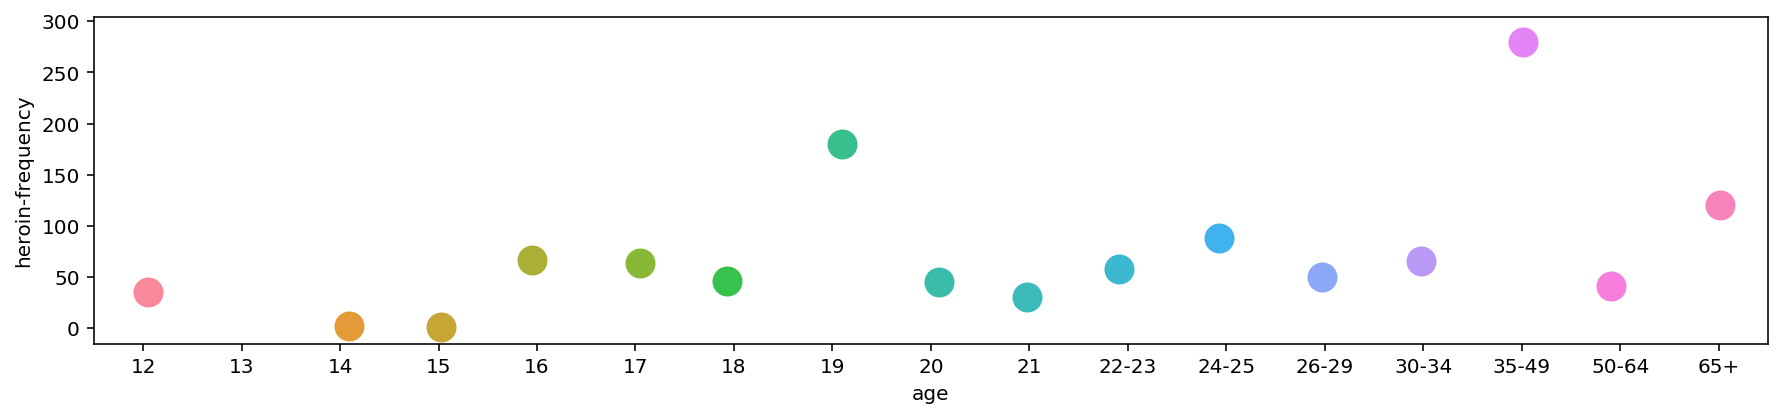

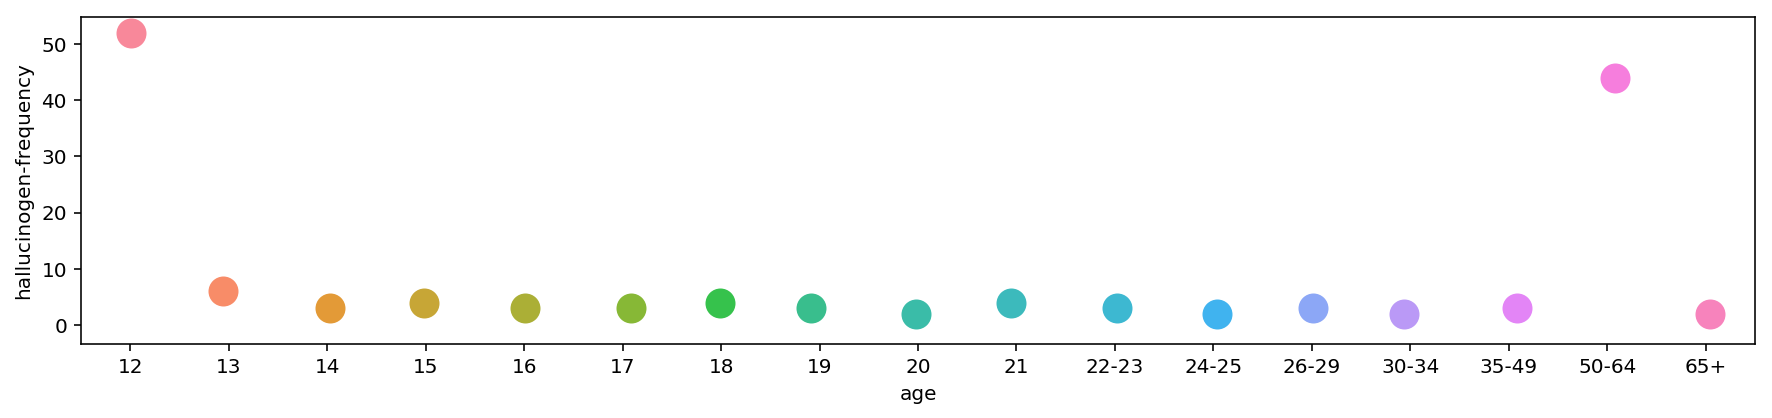

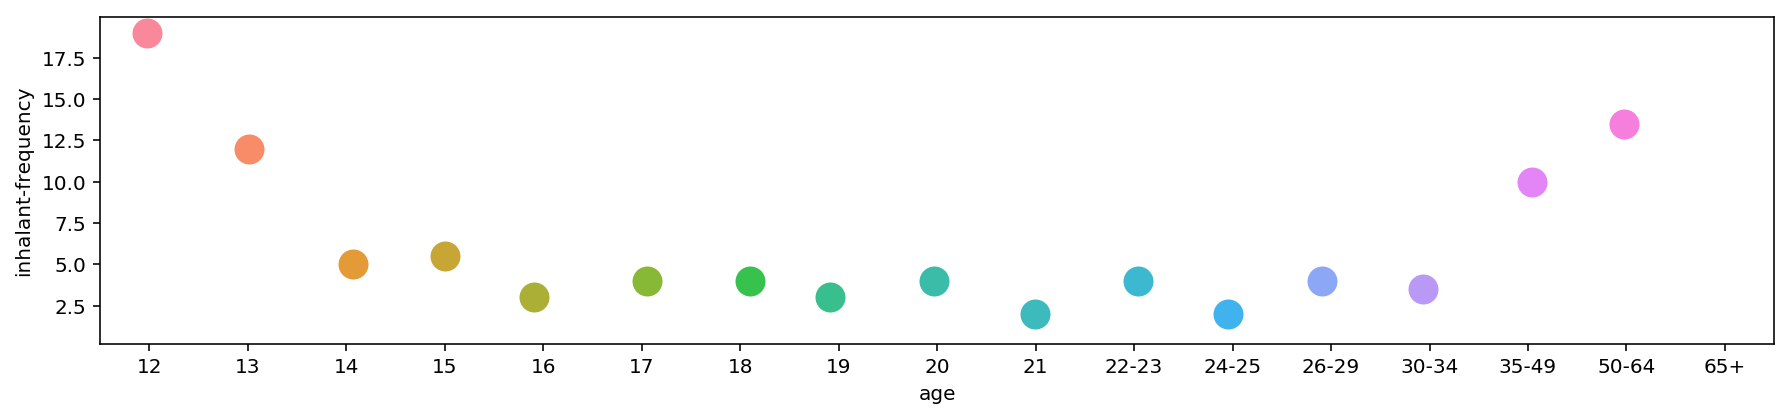

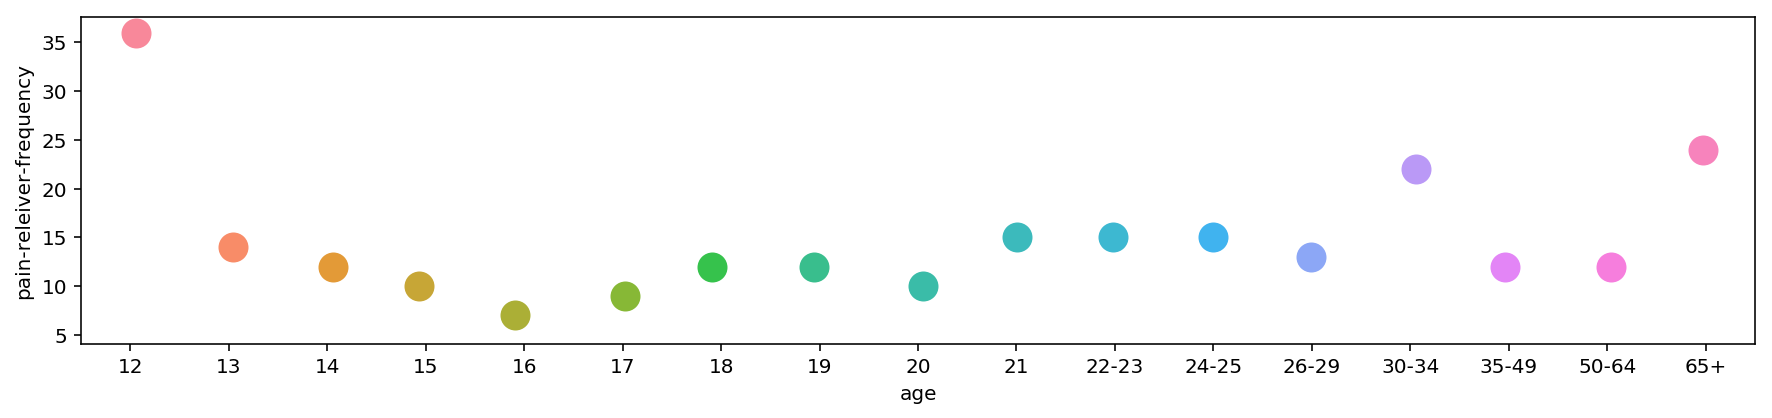

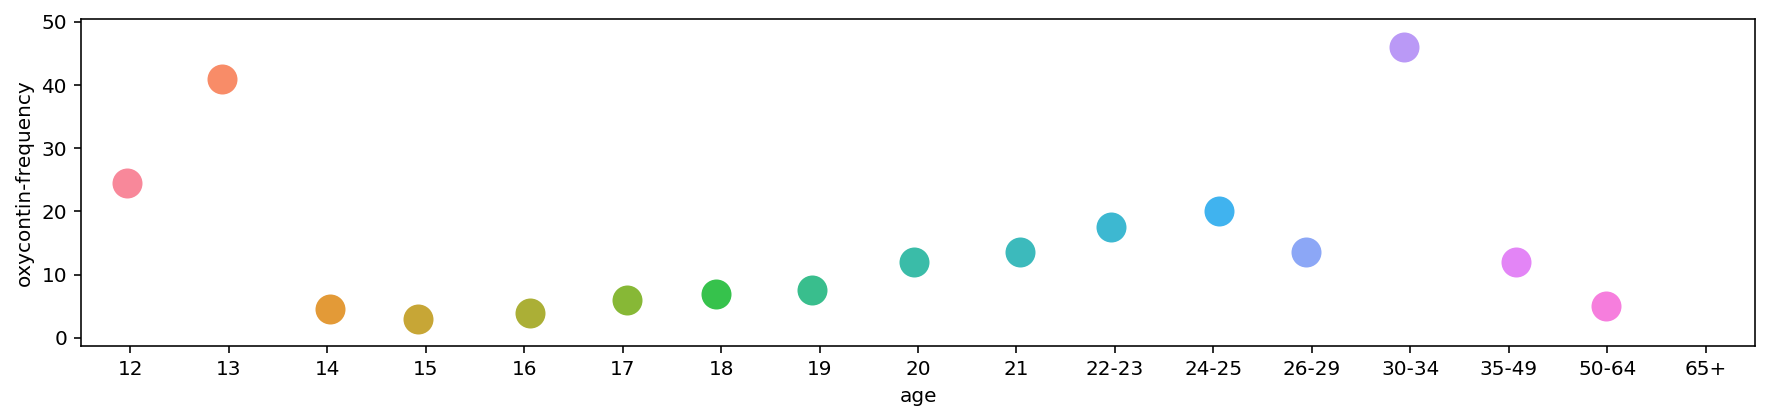

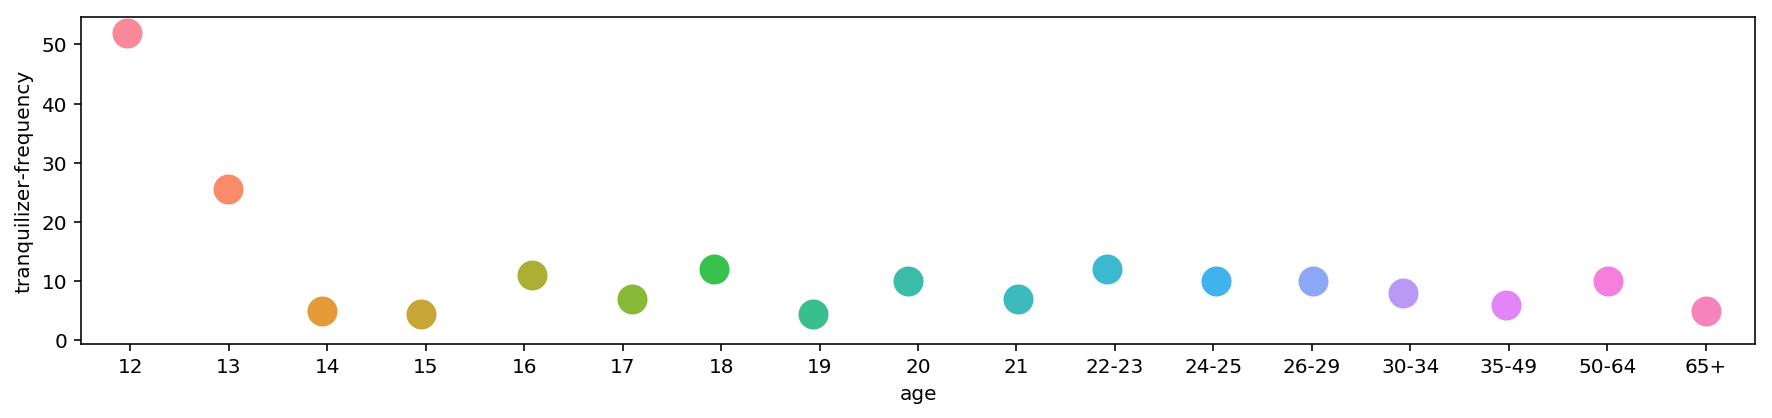

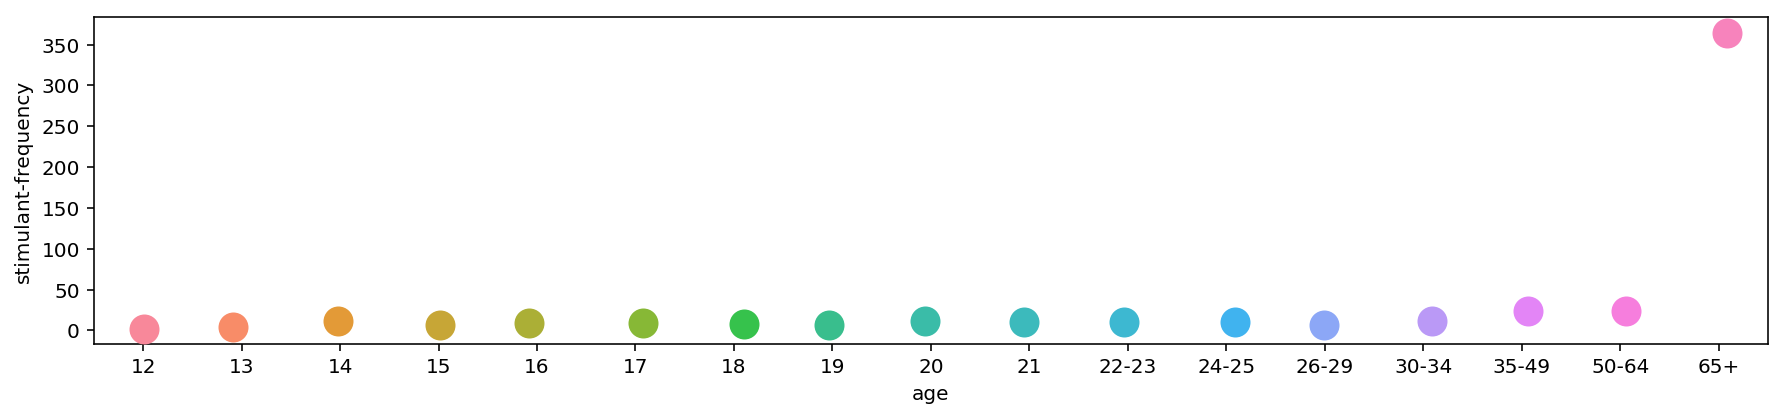

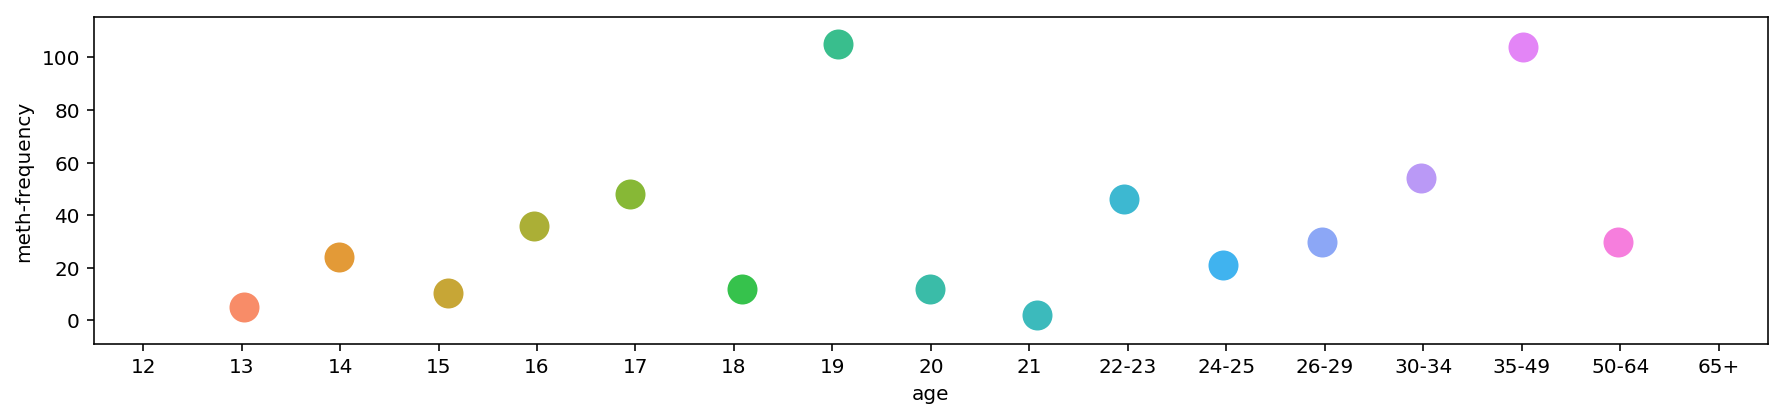

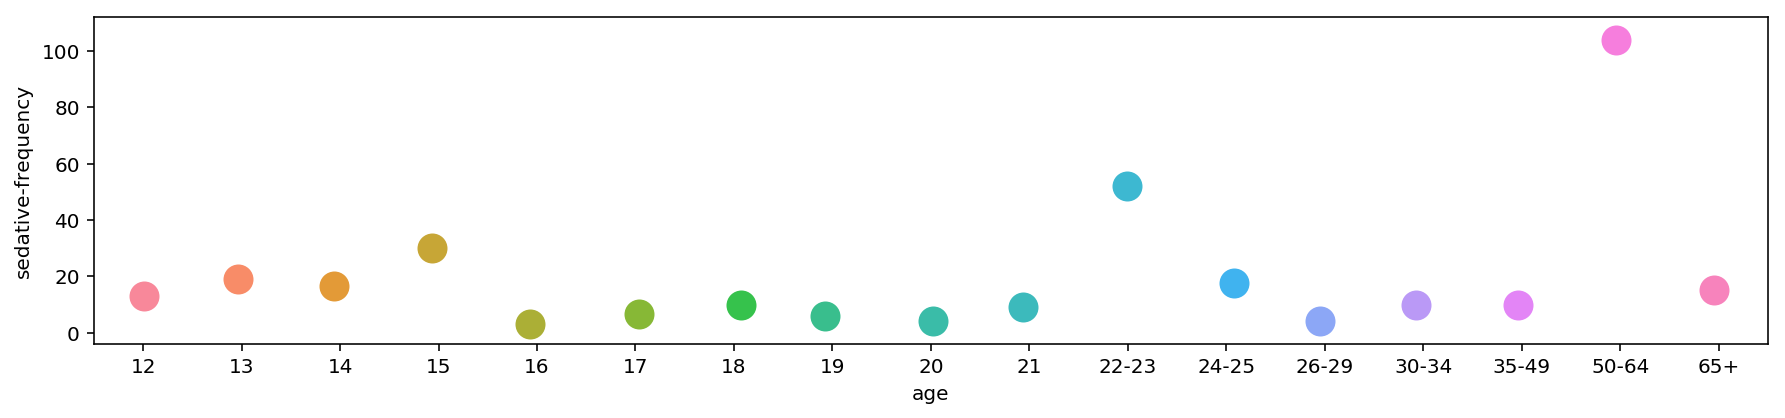

In [68]:
plotter(freq_columns)
# In general, substance use frequency has a trend of slight increase as age increases
# Could be because older people have more means to acquire these substances, because they are more addicted or cause they 
# simply have nothing better to do.

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.